# My First Data Science Project

In this notebook we will be doing:<br>
--> EDA<br>
--> See how different algorithms perform without preprocessing, parameter tuning<br>
--> See which algorithm is performing best<br>
--> We will then perform preprocessing, then evaluate and later we will perform parameter tuning<br>

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
# Importing dataset
df = pd.read_csv("datasets_19_420_Iris.csv")

<h2>EDA</h2>
<p>Every data science projects starts by understanding Data. So lets understand what our features are and what our target is</p>

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Looking at the data, we can say that our features <b><i>SepalLength, SepalWidth, PetalLength, PetalWidth</i></b> and Our target is <b><i>Species</i></b> i.e., we need to find to which species does the given flower belongs to when provided with above features.

==> So it is a <b>classification problem</b>

==> But we don't know how many classes the classification needs. So let us find that out.

In [6]:
df.groupby("Species").count()
#df["Species"].unique() # This will give an array of unique members

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


==> Now we come to know that the dataset contains 3 classes and we have 50 examples for each class

Now let us see if we have any null values in our dataset

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Voila! There are no null values.

Let us find few insights.

In [8]:
#df.info() #I would have ran it but it is a small dataset and we already know the datatypes
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This is not giving much info but usually it is good to look at the central tendencies of our dataset.

In [9]:
df[df["Species"]=="Iris-setosa"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [10]:
df[df["Species"]=="Iris-versicolor"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [11]:
df[df["Species"]=="Iris-virginica"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


Looking carefully at the above 3 dataframes we can come to few conclusions but let us try to visualize them.

we need to know what feature(s) can classifify them easily

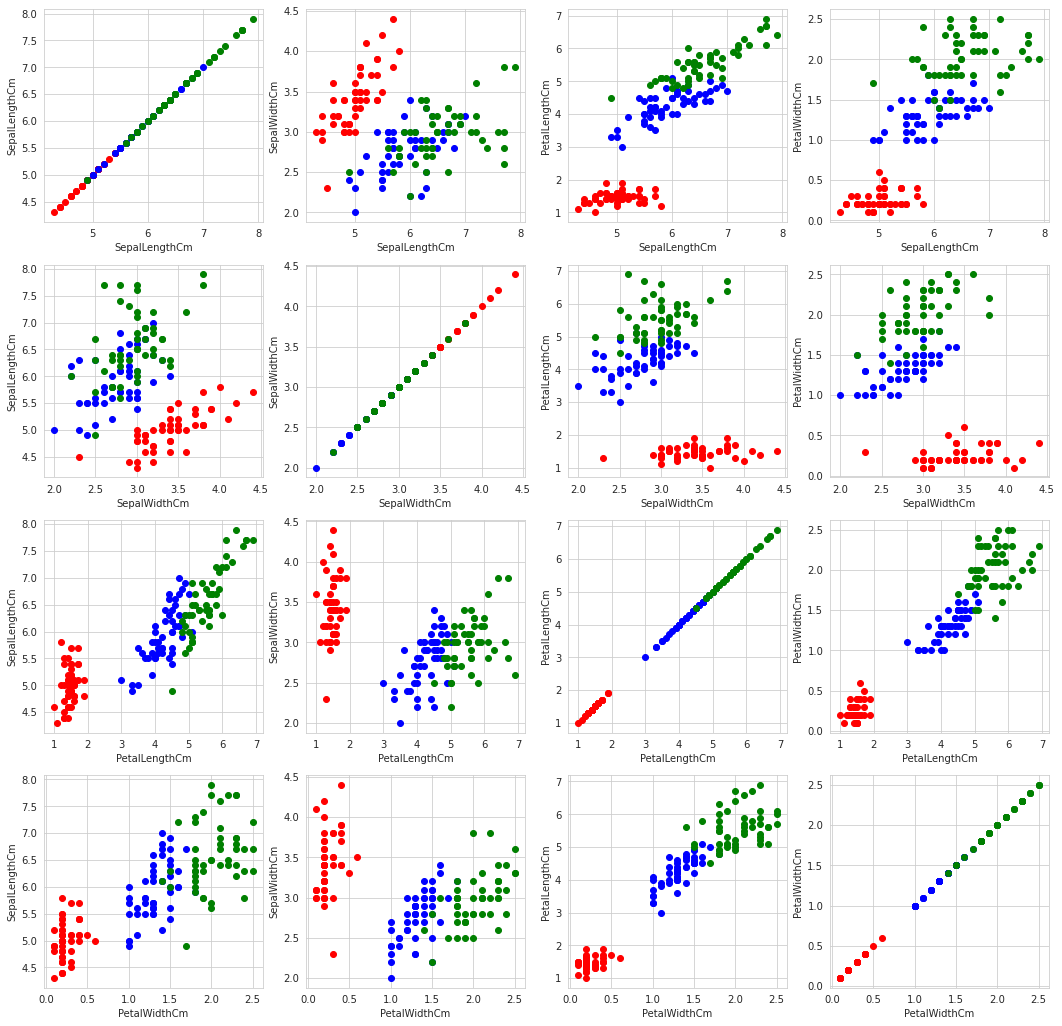

In [12]:
f = df.columns[1:-1] # total number of features i.e., len(f) = 4
K = df["Species"].unique() # total number of class i.e., len(K) = 3
# K = array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)
colors = ["red", "blue", "green"]
# Here red==Iris-setosa, blue==Iris-versicolor, green==Iris-virginica
fig, ax = plt.subplots(4,4, figsize=(18,18))
for i in range(len(f)):
    for j in range(len(f)):
        for k in range(len(K)):
            ax[i,j].scatter(df[df["Species"]==K[k]][f[i]], df[df["Species"]==K[k]][f[j]], color=colors[k])
        ax[i,j].set_xlabel(f[i])
        ax[i,j].set_ylabel(f[j])

We can see that setosa is easily seperable but virsicolor and virginica are merged a bit. 
However , the features that separates versicolor and virginica are <br>
petallength<br>
or <br>
petallength and petalwidth <br>
or <br>
sepallength and petalwidth <br>
or <br>
petallength and sepalwidth

This plot can be easily plotted using seaborn pairplot() as below

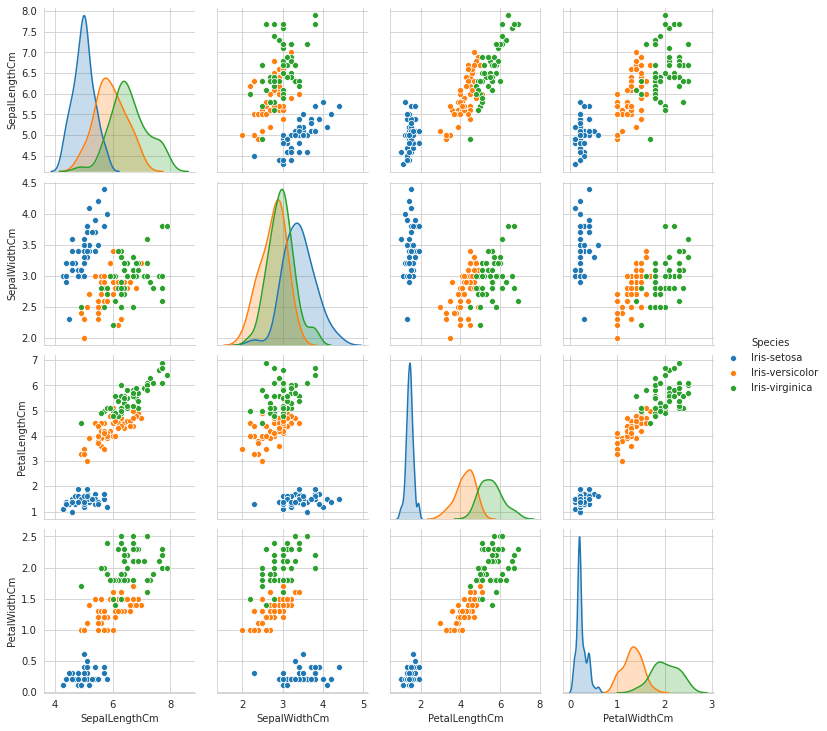

In [13]:
sns.pairplot(df[df.columns[1:]], hue="Species")

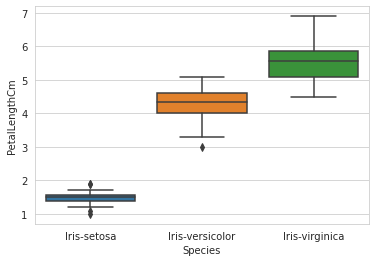

In [33]:
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

# Splitting Dataset

In [92]:
from sklearn.model_selection import train_test_split
X = df[df.columns[1:-1]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

For supervised classification we can use following models
1. logistic regression
2. svc
3. knn
4. decision trees
5. random forest
6. GBDT
7. Naive Bayes

# Feature Engineering
Try changing number of features(add new features) and see how the algorithms perform

In [93]:
# X_train = X_train[X_train.columns[-2:]]
# X_test = X_test[X_test.columns[-2:]]

# #or 

# X_train["new"] = X_train["PetalLengthCm"] + X_train["PetalWidthCm"]
# X_test["new"] = X_test["PetalLengthCm"] + X_test["PetalWidthCm"]

# Training

In [95]:
from sklearn.linear_model import LogisticRegression as lrc
from sklearn.svm import SVC as svc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.naive_bayes import GaussianNB as gnb

from sklearn.metrics import accuracy_score
models = [lrc(), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

1.0
1.0
0.98
0.98
1.0
0.98
0.98


# Feature Scaling

I don't think if we need to perform feature scaling here because the data is already on same scale.
But still we will see if that makes any changes

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

models = [lrc(), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

for model in models:
    model.fit(X_train2, y_train)
    pred = model.predict(X_test2)
    print(accuracy_score(y_test, pred))

0.98
0.98
0.98
0.94
1.0
0.98
0.98


In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)

models = [lrc(), svc(), knnc(), dtc(), rfc(), gbc(), gnb()]

for model in models:
    model.fit(X_train3, y_train)
    pred = model.predict(X_test3)
    print(accuracy_score(y_test, pred))

0.98
0.98
0.98
0.98
1.0
0.98
0.98


Scaling instead dropped the accuracy here!

# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
models = [lrc(), svc(), knnc(), dtc(), rfc()]
param_grid = [{'C': np.logspace(0, 4, 10)},
             {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}, 
             {'leaf_size' : list(range(1,50)),
              'n_neighbors' : list(range(1,30)),
              'p': [1,2]},
             {'criterion' : ['gini', 'entropy'], 
              'max_depth' : [4,6,8,12]},
             {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
             ]
for i in range(len(models)):
    clf = GridSearchCV(models[i], param_grid[i])
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(accuracy_score(y_test, pred))

/home/sidharthjain/anaconda3/envs/tensorflow_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
1.0
1.0
0.98
1.0


As we can see after parameter tuning, our 4 models did perform great with 100% accuracy on test data except for DecissionTreeClassifier